In [1]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb

import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

In [2]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,N,502,419,369,431,N,54,43,29,11,137,N
1069,3827,West Virginia University,WV,I,535,431,361,439,Y,642,521,438,529,N,335,237,272,22,895,Y
1070,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,N,572,494,434,495,N,25,22,24,3,74,N
1071,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,N,486,416,348,381,N,8,20,25,12,65,N


# 9.1.1

In [62]:
X = df.A15.to_numpy()
Y = df.A13.to_numpy()

In [63]:
data = pd.read_excel("../table.xls",sheet_name='A - aaup' )
X_grp = data.groupby(['A15']).groups
for key in X_grp:
    arr = []
    for i in range(len(X_grp[key])):
        j = X_grp[key][i]
        arr.append(Y[j])
    X_grp[key] = arr

In [64]:
X_grp

{6: [487, 353, 416, 378, 349, 510, 466, 458, 373, 392, 369], 7: [405, 342, 462, 429, 361, 453, 303, 391, 363, 386], 8: [366, 517, 363, 367, 406, 505, 482, 340, 386, 384, 423, 573, 363, 454, 464, 350, 357, 324, 371, 381], 9: [559, 434, 474, 435, 513, 456, 371, 388, 366, 375, 407, 397, 410, 420, 333, 455, 467, 420, 430, 368, 414, 386], 10: [413, 438, 468, 335, 415, 369, 377, 364, 356, 364, 389, 423, 401, 473, 492, 522, 443, 423, 423], 11: [412, 407, 444, 290, 340, 342, 335, 434, 374, 318, 404, 394, 364, 574, 387, 418, 554, 419, 339], 12: [415, 489, 347, 382, 374, 377, 394, 425, 429, 510, 446, 415, 407, 500, 465, 395, 473, 360, 406, 343, 448, 371], 13: [335, 318, 504, 443, 338, 441, 390, 347, 472, 454, 436, 500, 341, 603, 443], 14: [391, 456, 395, 502, 448, 436, 433, 435, 422, 452, 482, 382, 468, 481, 430, 469, 386], 15: [591, 411, 363, 440, 392, 448, 411, 427, 399, 449, 537, 425, 429, 379, 449, 503, 448, 541], 16: [527, 379, 398, 428, 502, 467, 469, 350, 358, 380, 483, 542, 494, 399, 381

In [65]:
X

array([  6,  74,   9, ...,  25,   8, 241], dtype=int64)

In [66]:
Y

array([487, 677, 559, ..., 495, 381, 549], dtype=int64)

In [67]:
r, _ = stats.pearsonr(X, Y)
s1 = np.std(X, ddof=1)
s2 = np.std(Y, ddof=1)
r, s1, s2

(0.5719628587649872, 145.87346745206614, 118.50561190713184)

In [68]:
beta_0 = np.mean(Y) - r * (s2/s1) * np.mean(X)

In [69]:
beta_1 = r * (s2/s1)

In [70]:
beta_0, beta_1

(488.9932986745056, 0.46465481180372936)

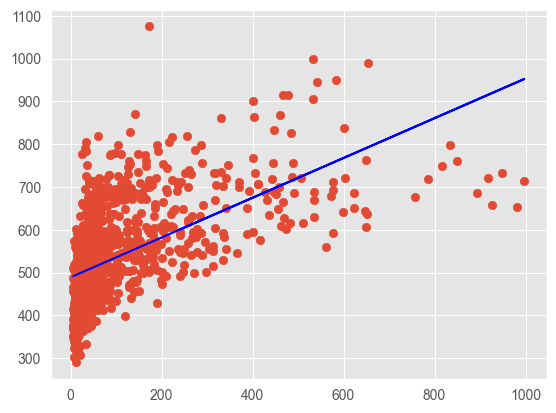

In [71]:
plt.scatter(X, Y)
lin_reg = beta_1 * X + beta_0
plt.plot(X, lin_reg, color='blue')

In [72]:
def f(x):
    return beta_1 * x + beta_0

In [77]:
def f1(x):
    return Y.mean() + (s2/s1)* r * (x - X.mean())

In [107]:
D_YX = 0
n = len(Y)
for key in X_grp:
    D_YX += 1/n * (np.array(X_grp[key]).mean() - Y.mean()) ** 2

D_res = 0
for i in range(n):
    D_res += 1/n * (Y[i] - f1(X[i])) ** 2

D_Y = 0
for i in range(n):
    D_Y += 1/n * (Y[i] - Y.mean()) ** 2

print(D_YX) # непрпаильно
# D_YX = D_Y - D_res
# print(D_YX)
print(D_res)
print(D_Y)

4704.091226794413
9440.535573858097
14030.49190804712


In [108]:
D_YX + D_res

14144.62680065251

In [ ]:
ESS = 0
n = len(Y)
for key in X_grp:
    ESS += (Y[i]) ** 2